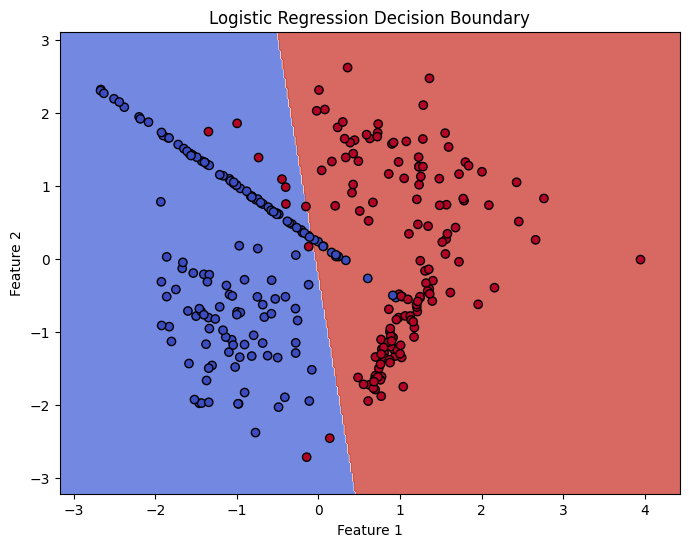

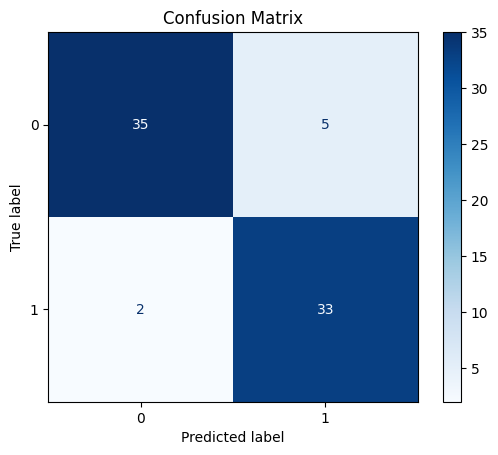

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os

# === Step 1: Create 'graphs' folder if it doesn't exist ===
graph_dir = "F:/GITHUB/customer-retention-mlops/graphs"
os.makedirs(graph_dir, exist_ok=True)

# === Step 2: Create dummy classification data ===
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0, random_state=42)

# === Step 3: Split the data ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# === Step 4: Train a Logistic Regression model ===
model = LogisticRegression()
model.fit(X_train, y_train)

# === Step 5: Plot the decision boundary ===
plt.figure(figsize=(8, 6))
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression Decision Boundary")

# === Save the decision boundary plot ===
plt.savefig(os.path.join(graph_dir, "decision_boundary.png"), dpi=300)
plt.show()

# === Step 6: Plot and save the confusion matrix ===
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")

# === Save the confusion matrix plot ===
plt.savefig(os.path.join(graph_dir, "confusion_matrix.png"), dpi=300)
plt.show()
